In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import math
import seaborn as sns 
from scipy.stats import pearsonr
from scipy import stats as sts

In [13]:
df = pd.read_csv('../dataset1/Seasons_Stats.csv')
df = df[(df.Year > 1980)&(df.Age > 18)&(df.Age < 40)&(df.MP > 500)]

attributes = ['PG', 'SG', 'SF', 'PF', 'C']
boolArray = df['Pos'].isin(attributes)
df = df[boolArray]

# Create the hist plots of the points of each player per season.

<AxesSubplot:title={'center':'zipf plot'}, xlabel='Ranks', ylabel='Points'>

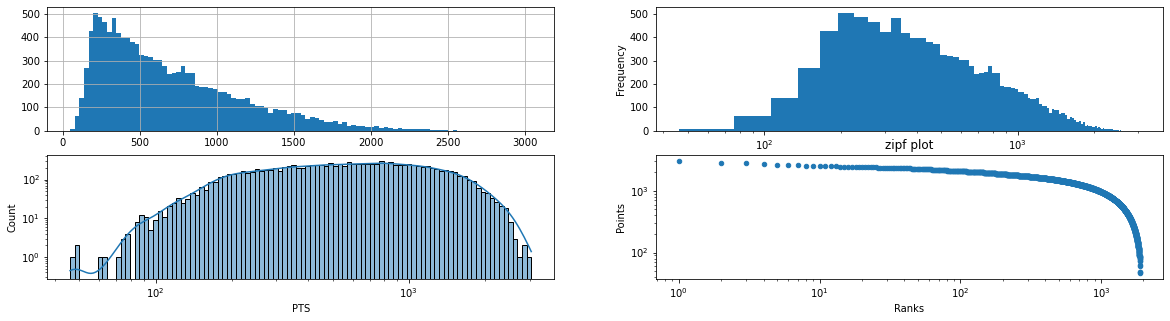

In [14]:
fig, axs = plt.subplots(2, 2,figsize=(20, 5))
pts = list(df['PTS'])

plt.title("histogram of points") 
df['PTS'].hist(bins=100, ax=axs[0, 0])

plt.title("histogram of points in logy scale") 
df['PTS'].plot(kind="hist", x='PTS', bins=100, logx=True, ax=axs[0, 1])

plt.title("points histogram in log-log scale") 
sns.histplot(data=df,x='PTS' ,bins=100, log_scale=(True, True), ax=axs[1, 0], kde=True)

p = set()
pts.sort(reverse = True)
rank = 1
ranks = []
for i in pts:
    if not i in p:
        ranks.append([i, rank])
        rank+=1
        p.add(i)

dfRanks = pd.DataFrame(ranks, columns = ['Points', 'Ranks'])
plt.title("zipf plot") 
dfRanks.plot(kind="scatter", x="Ranks", y='Points', ax=axs[1, 1], loglog=True)

<b> COMMENTS </b>
<ul>
    <li>
        From the histogram of players' points in each season we observe that the points follow an oblique and asymmetric distribution. Most players score 250-500 points per season while fewer and fewer score the most points. In the data we consider a different player someone who has played in different teams each season.
    </li>
</ul>

# Analyze how age affects player performance.

<AxesSubplot:xlabel='Age', ylabel='BPG'>

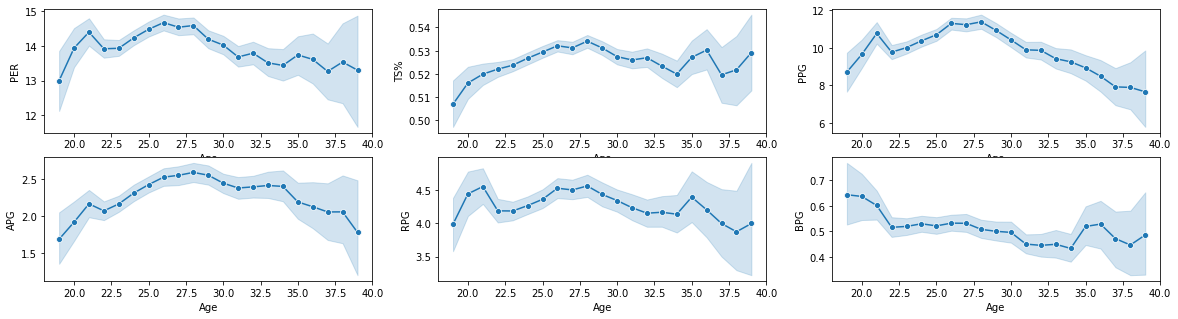

In [15]:
def ppg(row):
    if row.G > 0:
        return row.PTS/row.G
    return 0

def apg(row):
    if row.AST > 0:
        return row.AST/row.G
    return 0

def rpg(row):
    if row.G > 0:
        return row.TRB/row.G
    return 0

def bpg(row):
    if row.G > 0:
        return row.BLK/row.G
    return 0

df['PPG'] = df.apply(ppg, axis = 1)
df['APG'] = df.apply(apg, axis = 1)
df['RPG'] = df.apply(rpg, axis = 1)
df['BPG'] = df.apply(bpg, axis = 1)

fig, axs = plt.subplots(2, 3,figsize=(20, 5))

sns.lineplot(x= 'Age', y='PER',data = df,marker='o', ax=axs[0, 0])
sns.lineplot(x= 'Age', y='TS%',data = df,marker='o', ax=axs[0, 1])

sns.lineplot(x='Age', y='PPG', data = df, marker='o', ax=axs[0, 2])
sns.lineplot(x='Age', y='APG', data = df, marker='o', ax=axs[1, 0])
sns.lineplot(x='Age', y='RPG', data = df, marker='o', ax=axs[1, 1])
sns.lineplot(x='Age', y='BPG', data = df, marker='o', ax=axs[1, 2])



<b>COMMENTS</b>
<ul>
<li>
From the graphs we see that the age of the players affects performance.
</li>
<li>
In the case of TS% we see that at the age of 28 the players have the maximum accuracy and from there we have a small reduction of TS%.
</li>
<li>
In the case of PPG we see similar results to the case of PER, and it is expected because the efficiency of the players has a direct relation to the points they score.
</li>
<li>
In the case of APG, RPG notice that after 28 the performance of the players has a small drop, while for the BPG
we have maximum performance in small ages.
</li>
<li>
In the case of REr we see that at the age of 27 the players have the greatest performance, while at the beginning of their career they are more impractical and do not perform so well. After that the performance falls and reaches the performance they had in the beginning. This is also to be expected as the PER is derived and dependent upon the statistics PPG, APG, RPG, BPG.
</li>
</ul>

# Analyze if player performance with the age is affected by the position.

<AxesSubplot:xlabel='Age', ylabel='BPG'>

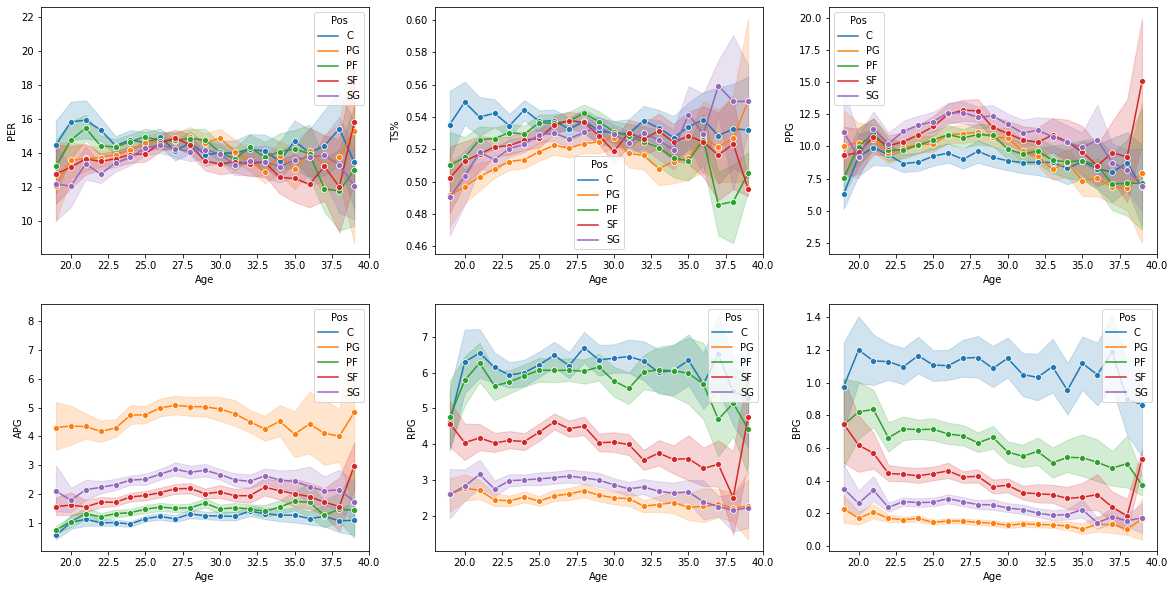

In [6]:
fig, axs = plt.subplots(2, 3,figsize=(20, 10))
sns.lineplot(x='Age', y='PER', data = df, marker='o', hue = df['Pos'], ax=axs[0, 0])
sns.lineplot(x='Age', y='TS%', data = df, marker='o', hue = df['Pos'], ax=axs[0, 1])
sns.lineplot(x='Age', y='PPG', data = df, marker='o', hue = df['Pos'], ax=axs[0, 2])
sns.lineplot(x='Age', y='APG', data = df, marker='o', hue = df['Pos'], ax=axs[1, 0])
sns.lineplot(x='Age', y='RPG', data = df, marker='o', hue = df['Pos'], ax=axs[1, 1])
sns.lineplot(x='Age', y='BPG', data = df, marker='o', hue = df['Pos'], ax=axs[1, 2])

<b>COMMENTS</b>
<ul>
<li>
From the graphs we see that the position influences the performance metrics of the players. For example, point guards have more assists than the rest while the main players note more blocks.
</li>
<li>
As we look at age, we see that it affects some positions more.For example, we see that C (PF) achieve more rebounds and blocks as time goes on. While players at SG positions, PG are not significantly improved. At the same time, SF get worse. In the case of TS% we see that the centrals have a slight improvement at the beginning but we can say that they have very good accuracy at the beginning while the rest improve over time. We also observe that in older ages SF, PF have low TS%.
</li>
<li>
For players' pains we see that after 28 players are affected by age to the same extent, while age has no great effect on assist.
</li>
<li>
Finally for the total PER we have maximum performance at 21 and from there all positions are affected the same, up to 35 of which
and then we have a different effect for each position
</li>
</ul>

# Investigate whether there is a correlation between the metrics PPG, APG, RPG, BPG.

Pearson Correlation results:
---------------------------------------------------------------
Pvalues:


,ppg,apg,rpg,bpg
ppg,0.000000e+00,4.245938e-188,4.492243e-156,2.390110e-27
apg,4.245938e-188,0.000000e+00,2.761998e-01,2.438791e-22
rpg,4.492243e-156,2.761998e-01,0.000000e+00,0.000000e+00
bpg,2.390110e-27,2.438791e-22,0.000000e+00,0.000000e+00


Coefficients:


,ppg,apg,rpg,bpg
ppg,1.000000,0.530809,0.489545,0.210661
apg,0.530809,1.000000,-0.021412,-0.189456
rpg,0.489545,-0.021412,1.000000,0.678075
bpg,0.210661,-0.189456,0.678075,1.000000


---------------------------------------------------------------


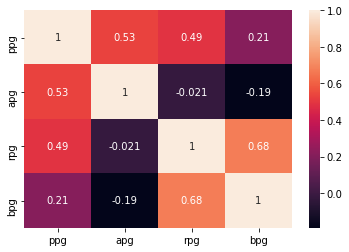

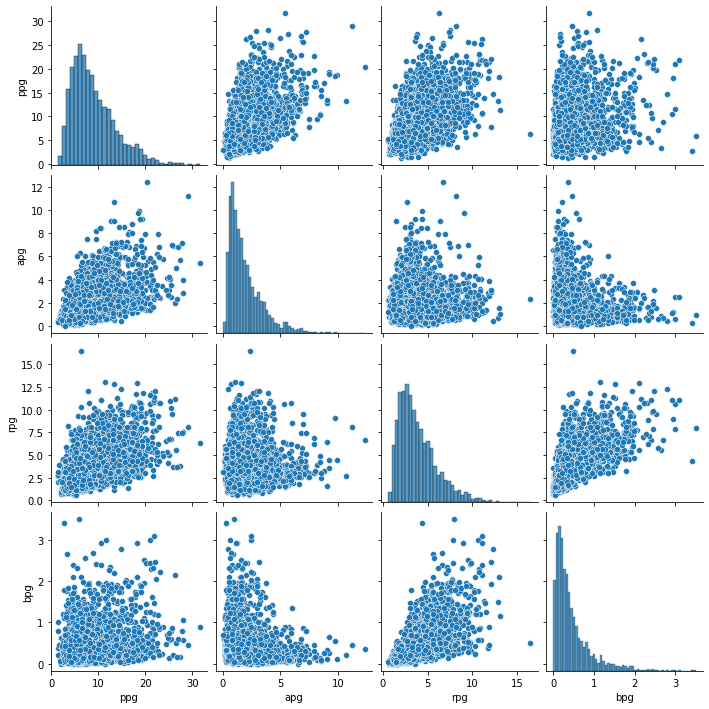

In [16]:
s = {'ppg':[], 'apg':[], 'rpg':[], 'bpg':[]}
p = []
peff = []

players = df.groupby(['Player', 'Pos'])
for po, stats in players:
    games = stats['G'].sum()
    ppg = stats['PTS'].sum()/games
    apg = stats['AST'].sum()/games
    rpg = stats['TRB'].sum()/games
    bpg = stats['BLK'].sum()/games
    per = stats['PER'].mean()
    s['ppg'].append(ppg)
    s['apg'].append(apg)
    s['rpg'].append(rpg)
    s['bpg'].append(bpg)
    p.append(po[1])
    peff.append(per)

coefficients = []
pvalues = []
for key in s:
    t = []
    c = []
    for key2 in s:
        cor = sts.pearsonr(s[key], s[key2])
        t.append(cor[1])
        c.append(cor[0])
    pvalues.append(t)  
    coefficients.append(c)
    
pvalues = pd.DataFrame(pvalues, columns = ['ppg', 'apg', 'rpg', 'bpg'], index=['ppg', 'apg', 'rpg', 'bpg'])
coefficients = pd.DataFrame(coefficients, columns = ['ppg', 'apg', 'rpg', 'bpg'], index=['ppg', 'apg', 'rpg', 'bpg'])

sns.heatmap(coefficients, annot=True)

statsdf = pd.DataFrame(s)
sns.pairplot(statsdf)

print("Pearson Correlation results:")
print("---------------------------------------------------------------")
print("Pvalues:")
display(pvalues)
print("Coefficients:")
display(coefficients)
print("---------------------------------------------------------------")


<b>COMMENTS</b>

<ul>
<li>
To implement the query, initially for each player and for each position we calculate the metrics PPG, APG, RPG, BPG based on the data from all the games he has played in all the seasons he took part. So for each player we have the average number of points, assists, blocks and rebounds for each game. If a player has played in different positions then we consider each position as a different case.
</li>
<li>
We then apply pearson correlation to examine whether there is any correlation between pairs of corr(X, Y) metrics. In addition, the corresponding coefficients and pvalues of the experiment are presented in tables.
</li>
<li>
Based on Heatmap and a pearson correlations, a significant positive linear correlation between BPG, RBG, and a little more mild between RPG, PPG and APG, PPG is observed. This is also evident in pairplots where we observe that in these cases the metrics are uniformly grouped.
</li>
<li>
We notice that the corresponding pvalues ≤ 0.05 so the results are statistically interesting.
</li>
</ul>

# BONUS

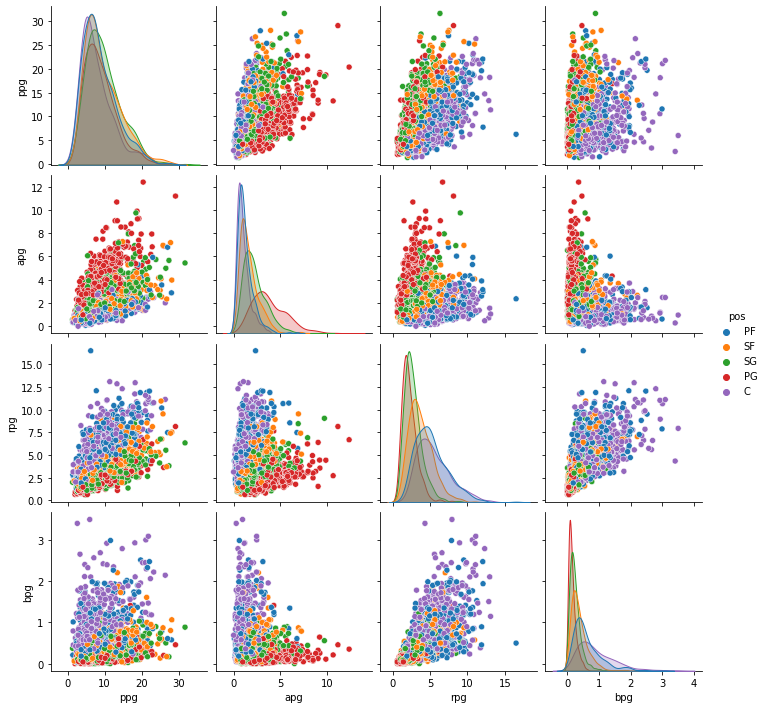

In [17]:
s['pos'] = p
posdf = pd.DataFrame(s)
sns.pairplot(posdf, hue="pos")

<b>COMMENTS</b><br>
Based on pair plots we see the following:
<ul>
<li>
For the PG position we see that the correlation silk pairs of metrics are larger and approaching a straight line. For
example in a game the more rebounds from the PG, the more assists we will have. The same applies to SG and SF.
</li>
<li>
For the center we see that we have a greater correlation in the cases of BPG-APG, RPG-APG, PPG-RPG, APG-PPG, while in the other cases the data is more dispersed.
</li>
<li>
For the PF position we see that in most cases the data is more dispersed.
</li>
</ul>

# Study if there is a difference between the performance of players who play in a different position.


<AxesSubplot:xlabel='pos', ylabel='bpg'>

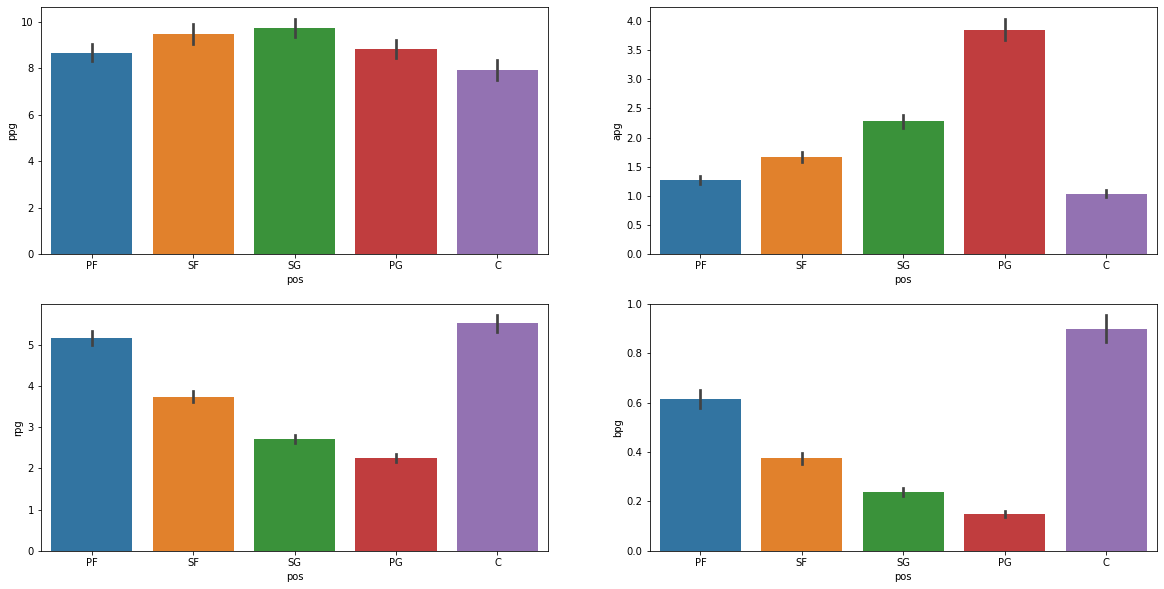

In [66]:
fig, axs = plt.subplots(2, 2,figsize=(20, 10))

sns.barplot(x='pos', y='ppg', data = posdf,ci=95, ax=axs[0, 0])
sns.barplot(x='pos', y='apg', data = posdf,ci=95, ax=axs[0, 1])
sns.barplot(x='pos', y='rpg', data = posdf,ci=95, ax=axs[1, 0])
sns.barplot(x='pos', y='bpg', data = posdf,ci=95, ax=axs[1, 1])

<b>COMMENTS</b><br>
For this experiment we use the metrics of the previous question but group them by assignment. Based on the barplots we observe the following:

<ul>
<li>
In the case of punches we have small miscellaneous ones with the shooting guards having the most points as they are usually the best shot in a team, while the center scoring the fewest points.
</li>
<li>
In the case of assists we see that there is a lot of different point guards with the rest since point guard in a group is usually the best in assists.
</li>
<li>
For the rebounds we see that the power forward and central note the most rebounds. And this is to be expected, as the center guys are usually the tallest on the team and they play near the basket, which is also true for power forward.
</li>
<li>
Finally for the blocks we see that the center players have the lead with the PF to follow, since in defense they focus on blocks and rebounds.
</li>
</ul>

# Find which position is the best for a player, by studying the PER metric in different positions.

T-Test results:
---------------------------------------------------------------
Pvalues:


,C,PF,PG,SF,SG
C,1.000000e+00,0.271043,0.000912,0.000006,1.513284e-07
PF,2.710426e-01,1.000000,0.013113,0.000175,5.721466e-06
PG,9.117597e-04,0.013113,1.000000,0.249272,6.068034e-02
SF,6.179456e-06,0.000175,0.249272,1.000000,4.758452e-01
SG,1.513284e-07,0.000006,0.060680,0.475845,1.000000e+00


---------------------------------------------------------------


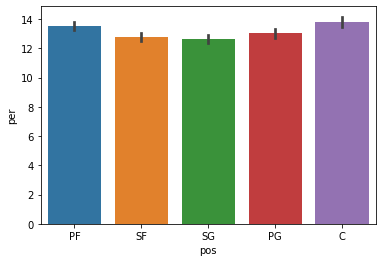

In [69]:
posdf['per'] = peff
sns.barplot(x='pos', y='per', data = posdf,ci=95)

per_by_pos = posdf.groupby('pos')
pvalues = []
for p1, data1 in per_by_pos:
    temp = []
    for p2, data2 in per_by_pos:
        temp.append(sts.ttest_ind(data1['per'], data2['per'])[1])
    pvalues.append(temp)

df2 = pd.DataFrame(pvalues, columns = ['C', 'PF', 'PG', 'SF', 'SG'], index = ['C', 'PF', 'PG', 'SF', 'SG'])

print("T-Test results:")
print("---------------------------------------------------------------")
print("Pvalues:")
display(df2)
print("---------------------------------------------------------------")


<b>COMMENTS</b><br>
In the case of PER we observe that the position does not affect it drastically. Using t-test we conclude that in the odd cases that we do not have significant various in efficiency are silk of positions SF-PG, C-PF, SF-SG since in these cases we have pvalue >= 0.05 and the null case is not refuted. In addition based on ttest we have greater significant various silk C-SG and less silk PG-PF.

# In this part we will focus our attention on player Russell Westbrook, who has achieved a significant number of Triple-Doubles.

In [21]:
df2 = pd.read_csv('../dataset2/games_details.csv', low_memory=False)
df1 = pd.read_csv('../dataset2/games.csv', low_memory=False)
df2 = df2[(df2.PLAYER_ID == 201566)]

total_wins = 0
trpdb_wins = 0
trdbs = 0
loses_trp = 0
    
all_games = pd.merge(df2, df1, on='GAME_ID')
all_games.dropna(subset=['PTS', 'AST', 'REB'], inplace=True)

def check_game(row):
    global total_wins, trpdb_wins, trdbs, loses_trp
    won = 0
    
    if row.TEAM_ID == row.TEAM_ID_home:
        won = row.HOME_TEAM_WINS
    else:
        if row.HOME_TEAM_WINS == 1:
            won = 0
        else:
            won = 1
    if row.PTS > 9 and row.AST > 9 and row.REB > 9:
        trdbs+=1
        if won == 1:
            trpdb_wins+=1
        else:
            loses_trp +=1
    if won == 1:
        total_wins+=1

all_games.apply(check_game, axis=1)
P = trpdb_wins/trdbs
P2 = total_wins/len(all_games)

print('Probabilities based on the games Russel has played: ')
print("---------------------------------------------------------------")
print('Probability of victory if triple-double: ', P)
print('Probability of victory: ', P2)

wins_no_td = total_wins - trpdb_wins
loses_no_td = len(all_games) - total_wins - loses_trp

contigency_matrix = pd.DataFrame([[trpdb_wins, wins_no_td], [loses_trp, loses_no_td]], columns=['Trp Double', 'No Trp Double'], index = ['victory', 'defeat'])

print("---------------------------------------------------------------")
print('Contigency Matrix:')
display(contigency_matrix)
chisTest = sts.chi2_contingency(contigency_matrix)
print("Chi squere Test results:")
print('pvalue: ',  chisTest[1])
print("---------------------------------------------------------------")


Probabilities based on the games Russel has played: 
---------------------------------------------------------------
Probability of victory if triple-double:  0.7277227722772277
Probability of victory:  0.5833333333333334
---------------------------------------------------------------
Contigency Matrix:


,Trp Double,No Trp Double
victory,147,511
defeat,55,415


Chi squere Test results:
pvalue:  6.319251561325676e-06
---------------------------------------------------------------


<b>COMMENTS</b><br>
The possibility of the team winning when he has achieved triple-double is the possibility of winning and having achieved triple double towards the possibility of achieving triple double in a game. We see that this probability is greater than the probability of his team winning independently and therefore he does not succeed at the expense of his team.</br>
To consider whether having triple-double Westbrook and winning his team is independent we make the following assumptions which we will decide using x^2 test of independence, having calculated the contingency table.
<ul>
<li>
H0: There is no dependence between a win and having achieved triple-double.
</li>
<li>
H1: There is a dependency between a win and having achieved triple-double.
</li>
</ul>
Because the pvalue < 0.05 H0 is dropped, which means there is a dependency.

# Bonus - The haters claim that Russel achieves tripple-doubles against weak teams

In [22]:
trp_on_lose = loses_trp/(len(all_games) - total_wins)
trp_on_win = trpdb_wins/total_wins

print("Probability of triple-double in a defeat: ", trp_on_lose)
print("Probability of triple-double in a victory: ", trp_on_win)


Probability of triple-double in a defeat:  0.11702127659574468
Probability of triple-double in a victory:  0.22340425531914893


<b>COMMENTS</b><br>
For this check we calculate the chances of triple-double achieving while he has lost and the chance of having triple-double given that he has won. We see that there is greater likely to achieve triple-double in a win than in a defeat so the haters have a valid case.

# Study if there is a correlation between the number of assists of the peripheral players give to one team (the backcourt - PG, SG) and the points scored by the tall ones in the team (the frontcourt - SF, PF).

Pearson Correlation Test results:
---------------------------------------------------------------
r = 0.5883975438970075, pvalue = 1.1964633435022947e-99
---------------------------------------------------------------


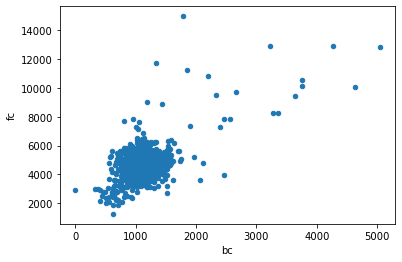

In [11]:
posStats = {"bc":[], "fc":[]}

bc = ['PG', 'SG']
fc = ['SF', 'PF', 'C']

teams = df.groupby(['Tm', 'Year'])
for team, stats in teams:
    asts = stats.loc[stats['Pos'].isin(bc), 'AST'].sum()
    pts = stats.loc[stats['Pos'].isin(fc), 'PTS'].sum()
    posStats["bc"].append(asts)
    posStats["fc"].append(pts)
    
posdf = pd.DataFrame(data=posStats)
posdf.plot(kind="scatter", x="bc", y="fc")

print("Pearson Correlation Test results:")
print("---------------------------------------------------------------")
pear = sts.pearsonr(posdf['bc'], posdf['fc'])
print("r = %s, pvalue = %s" % (pear[0], pear[1]))
print("---------------------------------------------------------------")


<b>COMMENTS</b></br>
To conduct the experiment we first calculate for each group and for each year the number of assist from PG, SG and
the number of points from SF, PF and C.<br>
We notice that in a group there is a very significant linear correlation between assist and points from regional and high players since r = 0.58. Because we have pvalue <= 0.05, the statistics are important.

# In this part we will find out if teams score an average of more points at home vs away.


## T-Test method

T-Test results:
---------------------------------------------------------------
Bostons: 
Ttest_indResult(statistic=2.9653407705924826, pvalue=0.0030645401863957757)
---------------------------------------------------------------
Timberwolves: 
Ttest_indResult(statistic=1.2434551315062352, pvalue=0.21388557122982726)
---------------------------------------------------------------


<AxesSubplot:ylabel='Density'>

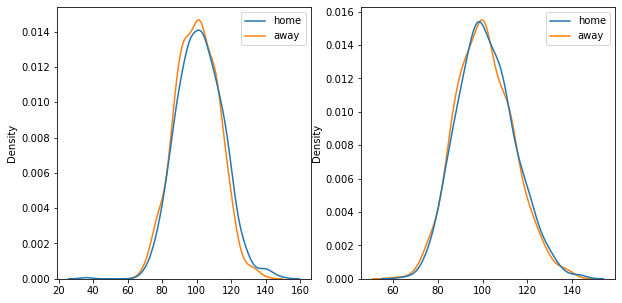

In [82]:
ids = ['1610612738', '1610612750']
df1 = df1[(df1.HOME_TEAM_ID == 1610612738)|(df1.HOME_TEAM_ID == 1610612750)|(df1.VISITOR_TEAM_ID == 1610612738)|(df1.VISITOR_TEAM_ID == 1610612750)]

bos_team = {'home':[], 'away':[]}
min_team = {'home':[], 'away':[]}
df1.dropna(subset=['PTS_home', 'PTS_away'], inplace=True)

for i in range(len(df1)):
    row = df1.iloc[i]
    if row['HOME_TEAM_ID'] == 1610612738:
        bos_team['home'].append(row['PTS_home'])
    if row['VISITOR_TEAM_ID'] == 1610612738:
        bos_team['away'].append(row['PTS_away'])
    if row['HOME_TEAM_ID'] == 1610612750:
        min_team['home'].append(row['PTS_home'])
    if row['VISITOR_TEAM_ID'] == 1610612750:
        min_team['away'].append(row['PTS_away'])

bosdf = pd.concat([pd.DataFrame(bos_team['home']), pd.DataFrame(bos_team['away'])], axis = 1)
bosdf.columns = ['home', 'away']
bosdf.dropna(subset=['home', 'away'], inplace=True)

mindf = pd.concat([pd.DataFrame(min_team['home']), pd.DataFrame(min_team['away'])], axis = 1)
mindf.columns = ['home', 'away']
mindf.dropna(subset=['home', 'away'], inplace=True)

print("T-Test results:")
print("---------------------------------------------------------------")
print('Bostons: ')
print(sts.ttest_ind(bosdf['home'], bosdf['away']))
print("---------------------------------------------------------------")
print('Timberwolves: ')
print(sts.ttest_ind(mindf['home'], mindf['away']))
print("---------------------------------------------------------------")

fig, axs = plt.subplots(1, 2,figsize=(10, 5))
sns.kdeplot(data=bosdf,  ax=axs[0])
sns.kdeplot(data=mindf,  ax=axs[1])



<b>COMMENTS</b><br>
To examine the case we store the points that each team had at home and away. Where we have null values we remove the lines. After t-tests per team we observe the following:
<ul>
<li>
For Boston Celtics we see that they do achieve more points at home than they do at home. Since pvalue < 0.05 the results are statistically significant.
</li>
<li>
For Minnesota Timberwolves we see a big pvalue so we can't say we have a big difference in media.
</li>
</ul>

## Permutation Method

experiential pvalue of Bostons Test= 0.002
experiential pvalue of Minnesota Test= 0.112


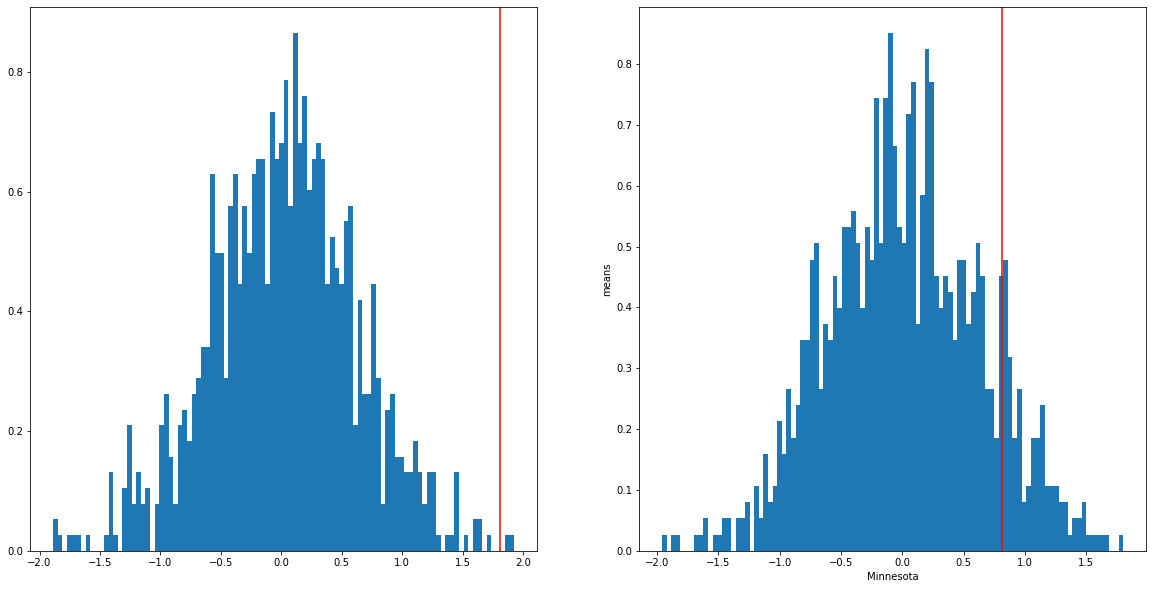

In [85]:

bos_games = {'pts':[], 'label':[]}
min_games = {'pts':[], 'label':[]}

def get_mean_dif(d):
    home = [0, 0]
    away = [0, 0]
    for i in range(len(d['pts'])):
        if d['label'][i] == 'home':
            home[0]+=1
            home[1]+=d['pts'][i]
        else:
            away[0]+=1
            away[1]+=d['pts'][i]
    return home[1]/home[0] - away[1]/away[0]

for i in range(len(df1)):
    row = df1.iloc[i]
    if row['HOME_TEAM_ID'] == 1610612738:
        bos_games['pts'].append(row['PTS_home'])
        bos_games['label'].append('home')
    if row['VISITOR_TEAM_ID'] == 1610612738:
        bos_games['pts'].append(row['PTS_away'])
        bos_games['label'].append('away')
    if row['HOME_TEAM_ID'] == 1610612750:
        min_games['pts'].append(row['PTS_home'])
        min_games['label'].append('home')
    if row['VISITOR_TEAM_ID'] == 1610612750:
        min_games['pts'].append(row['PTS_away'])
        min_games['label'].append('away')

bos_observed = get_mean_dif(bos_games)
min_observed = get_mean_dif(min_games)

bos_means = []
min_means = []

counter1 = 0
counter2 = 0

bos_games['label'] = np.array(bos_games['label'])
min_games['label'] = np.array(min_games['label'])

for i in range(1000):

    bos_games['label'] =  np.random.permutation(bos_games['label'])
    min_games['label'] =  np.random.permutation(min_games['label'])
    
    dif1 = get_mean_dif(bos_games)
    dif2 = get_mean_dif(min_games)
    
    if dif1 >= bos_observed:
        counter1 += 1
    if dif2 >= min_observed:
        counter2 +=1
    
    bos_means.append(dif1)
    min_means.append(dif2)
    
pvalue1 = counter1/1000
pvalue2 = counter2/1000

bos_means = pd.DataFrame(bos_means)
min_means = pd.DataFrame(min_means)

fig, axs = plt.subplots(1, 2,figsize=(20, 10))

axs[0].hist(bos_means, density=True, bins=100)
axs[0].axvline(x = bos_observed, ymin = 0, ymax = 1, color ='red')
plt.ylabel('means')
plt.xlabel('Bostons');

axs[1].hist(min_means, density=True, bins=100)
axs[1].axvline(x = min_observed, ymin = 0, ymax = 1, color ='red')
plt.ylabel('means')
plt.xlabel('Minnesota')

print('experiential pvalue of Bostons Test= %s' % pvalue1)
print('experiential pvalue of Minnesota Test= %s' % pvalue2)


<b>COMMENTS</b><br>

<ul>
<li>
In the case of Bostons we have an empirical pvalue of less than 0.05 so the observed various are statistically significant and the Null hypothesis is refuted.
</li>
<li>
For Minnesota we have a big pvalue so the observed value is insignificant.
</li>
<li>
The results are also shown by the graphs which show us the percentages of empirical values that exceed the observed values.
</li>
</ul>
